In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use("bmh")

#  **d)** Gráfico del potencial eléctrico

En este ítem se utilizó el resultado calculado en **(a)** para gráficar el potencial respecto a la distancia al centro de la bola. Esto es:

$$ \Phi(z)=
  \left \{
    \begin{aligned}
      \frac{kQ}{2R^3}\left( 3R^2 -z^2 \right)&; 0\leq z \leq R \\
      \frac{kQ}{z} &; z \geq R.
    \end{aligned}
  \right .
$$

Para el gŕafico se consideró el radio de la bola $R=1$[m] y la carga $Q=1$[C], luego se generaliza en términos de las magnitudes presentadas en la ecuación anterior. Además, suponemos que trabajamos con una distancia $z$ medida en metros. De esta forma, consideramos el potencial medido en Voltios [V].

In [2]:
e_0 = 8.85*10**(-12) #Epsilon.
k = 1/(4*np.pi*e_0) # Constante eléctrica.

# Definimos la función Potencial dentro de la bola.
def potencial_in(r, R=1, Q=1):
    return (k*Q*0.5)/(R**3)*(3*R**2 - r**2) 

#Definimos la función Potencial fuera de la bola.
def potencial_out(r,Q=1):
    return k*Q/r

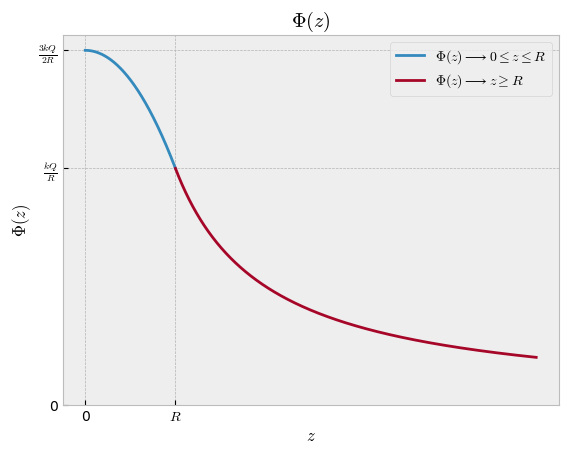

In [54]:
#Gráfico de la función Potencial
r1= np.linspace(0,1,10**3)
r2 = np.linspace(1,5,10**3)
plt.plot(r1,potencial_in(r1), label = r"$\Phi(z) \longrightarrow 0 \leq z \leq R$")
plt.plot(r2,potencial_out(r2), label = r"$\Phi(z) \longrightarrow z \geq R$")
plt.xlabel(r"$z$")
plt.ylabel(r"$ \Phi(z)$")
plt.title("$\Phi(z)$")
plt.xticks([0,1],[0,"$R$"])
plt.yticks([0,potencial_in(r1).max(),potencial_in(1)], [0,"$ \\frac{3kQ}{2R} $", "$ \\frac{kQ}{R} $"])
plt.legend()
plt.savefig("Potencial.pdf")
plt.show()

# **e)** Gráfico del Campo Eléctrico

En este ítem se utilizó el resultado calculado en **(b)** para gráficar el modulo del campo eléctrico respecto a la distancia al centro de la bola. Esto es:

$$ E(z)=
  \left \{
    \begin{aligned}
      \frac{kQz}{R^3}&; 0 \leq z \leq R \\
      \frac{kQ}{z^2} &; z \geq R.
    \end{aligned}
  \right .
$$

Para el gŕafico se consideró el radio de la bola $R=1$[m] y la carga $Q=1$[C], luego se generaliza para las magnitudes presentadas en la ecuación precedente. Además, suponemos que trabajamos con una distancia $z$ medida en metros. De esta forma, consideramos el Campo Eléctrico medido en voltios por metro [V/m].

In [4]:
#Definimos el Campo Eléctrico dentro de la bola.
def camp_in(r,Q=1,R=1):
    return k*Q*r/R**3

#Definimos el Campo Eléctrico fuera de la bola.
def camp_out(r,Q=1):
    return k*Q/r**2

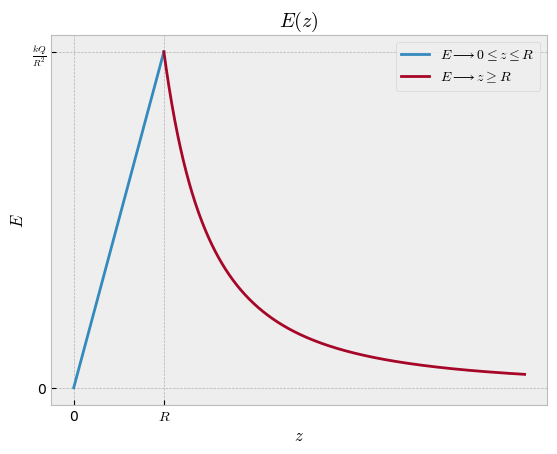

In [53]:
#Gráfico del Campo Eléctrico.
plt.plot(r1,camp_in(r1), label = r"$E \longrightarrow 0 \leq z \leq R$")
plt.plot(r2,camp_out(r2), label = r"$E \longrightarrow z \geq R$")
plt.xlabel(r"$z$")
plt.ylabel(r"$E$")
plt.legend()
plt.title("$E(z)$")
plt.xticks([0,1],[0,"$R$"])
plt.yticks([0,camp_in(r1).max()], [0,"$\\frac{kQ}{R^2}$"])
plt.savefig("Campo_electrico.pdf")
plt.show()


# **g)** Gráfico del Campo Eléctrico generado por dos bolas de carga opuesta

En este ítem se utilizó el resultado calculado en **(g)** para gráficar el Campo Eléctrico generado por dos bolas de carga opuesta (la bola positiva centrada en el origen) separadas una distancia $d$ entre sus centros. Esto es:

$$ \vec{E}(\vec{x}) = kQ \left[ \frac{x\hat{x}+y\hat{y}+z\hat{z}}{\left( x^2+ y^2 + z^2 \right)^{3/2}}  - \frac{(x-d)\hat{x}+y\hat{y}+z\hat{z}}{\left( (x-d)^2+ y^2 + z^2 \right)^{3/2}}\right]. $$

Sin embargo, la gráfica es realizada en plano que contiene a ambas bolas, en este caso el plano XY. Por lo tanto, y por simplicidad, se considera $z=0$ y la expresióń del Campo Eléctrico se reduce a:
$$ \vec{E}(\vec{x}) = kQ \left[ \frac{x\hat{x}+y\hat{y}}{\left( x^2+ y^2 \right)^{3/2}}  - \frac{(x-d)\hat{x}+y\hat{y}}{\left( (x-d)^2+ y^2 \right)^{3/2}}\right].$$

En el gŕafico se consideró la distancia entre las bolas $d=7.5$[m], la carga $Q=1$[C] y el radio de las bolas de $R=1[m]$. Además, suponemos que trabajamos con las distancias $x,y$ medidas en metros. De esta forma, el Campo Eléctrico resulta con unidad de medida en  Voltios por metro [V/m]].

In [46]:
#Definimos la malla a usar
n = 30 # nodos de la grilla
max = 10# máximo y mínimo del gráfico
X = np.linspace(-max,max,n)
Y = np.linspace(-max,max,n)
x,y = np.meshgrid(X,Y)

In [41]:
# Definimos la componente del Campo Eléctrico en x
def Ex(x,y,d=7.5,Q=1,R=2): 
    b = x-d
    r1 = (x**2 + y**2)**1.5
    r2 = (b**2 + y**2)**1.5
    return k*Q*(x/r1 - b/r2)

# Definimos la componente del Campo Eléctrico en y
def Ey(x,y,d=7.5,Q=1,R=2):
    b = x-d
    r1 = (x**2 + y**2)**1.5
    r2 = (b**2 + y**2)**1.5
    return k*Q*(y/r1 - y/r2)

# Definimos la magnitud del Campo Eléctrico para posterior normalización.
def E(x,y):
    E = np.sqrt(Ex(x,y)**2 + Ey(x,y)**2) 
    return E

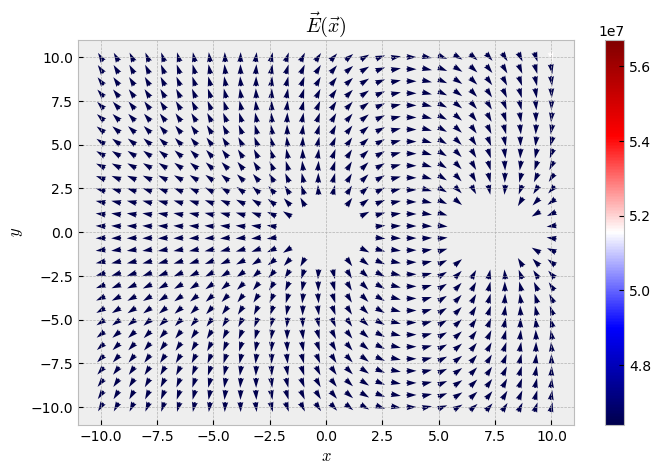

In [48]:
#Graficamos el Campo Eléctrico Normalizado.
plt.figure(figsize=(8,5))
for i in range(n): #Realizamos dos iteraciones para considerar todos los puntos (x_i, y_j) de la grilla.
    for j in range(n):
        a,b = x[i][j], y[i][j] # Dado que x,y son matrices, trabajamos con x[i][j] es decir el elemento a_ij de la matriz x para establecer una condición posteriormente. 
        if a**2 + b**2 >= 4 and (a-7.5)**2 + b**2 >= 4: #Establecemos los valores permitidos del Campo Eléctrico (Fuera de las bolas) con un condicional.
            plt.quiver(a,b,Ex(a,b)/E(a,b),Ey(a,b)/E(a,b), E(a,b), cmap="seismic", color='blue', scale=50, pivot='middle')
            plt.xlim(-1.1*max,1.1*max)
            plt.ylim(-1.1*max,1.1*max)
            plt.xlabel('$x$')
            plt.ylabel('$y$')
            plt.title('$\\vec{E}(\\vec{x})$') 
plt.colorbar()
plt.savefig("Campo_electrico_malla.pdf")
plt.show()